# Retail Store Data Analysis
### By: Mark Ehab Aziz
#### (Built Under Pyhon 3.11.4)
#### **Note: Importing the dataset could take up to sub 50s**
Given data of transactions, we are tasked to use *"Unsupervised Machine Learning Models"* to classify and cluster.

# Dependency Checklist
Ensure that the following modules are installed:
- Pandas
- Numpy
- Seaborn
- Matplotlib
- Openpyxl

In [2]:
# Importing Libraries
import pandas as pd                # Dataframe operations and input
import numpy as np                 # Numerical operations, Linear Alg
import seaborn as sns              # Visualising
from sklearn.cluster import KMeans # KMeans Clustering Algorithm

In [3]:
# Loading Data
# Like the previous project
# I'm using 2 methods to import data
# 1 - Path to Different Folder (Within my Github Repo)
retail_dat = pd.read_excel("../dataset/Online Retail.xlsx")

# 2 - Path within same file
#retail_dat = pd.read_excel("./Online Retail.xlsx")

# Data Exploration
Using `.head(n)` and `.tail(n)` to inspect the $n^{th}$ rows.

Using `.info()` for information regarding columns.

Using `.describe()` to give statistical information about numeric columns.

In [4]:
# Defining nth row to view on head or tail
n = 5

# Viewing head and tail (Same Output Cell)
display(retail_dat.head(n), retail_dat.tail(n))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
# Showing General Information about Columns
retail_dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Expected `InvoiceNo` to be all `int64` (Outliers are what make it an `Object`)\
Expected `CustomerID` to be `int64` (Type casting into `int64`)\
Missing Values at `CustomerID` (Vital-ish, Loss of $135,080$ rows ($\approx25\%$)) and `Description`\
Rest seems nominal

In [6]:
# Data Description
retail_dat.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


Outliers on `Quantity` $\rightarrow$ Negative Values, Absurd Maximum\
Outliers on `UnitPrice` $\rightarrow$ Negative Values, Absurd Maximum

# Data Cleaning
Removing incorrect data.

Such as:
- Negative Values
- Out of Logical Range Values

Or missing data

In [7]:
# Removing negatives for
# Quantity, UnitPrice

print("Minimum value for Quantity: {}".format(min(retail_dat['Quantity'])))
print("Minimum value for Price: {}".format(min(retail_dat['UnitPrice'])))

print("Removing Negatives\n")
retail_dat = retail_dat[retail_dat['Quantity'] > 0]
retail_dat = retail_dat[retail_dat['UnitPrice'] > 0]

print("Minimum value for Quantity: {}".format(min(retail_dat['Quantity'])))
print("Minimum value for Price: {}".format(min(retail_dat['UnitPrice'])))

Minimum value for Quantity: -80995
Minimum value for Price: -11062.06
Removing Negatives

Minimum value for Quantity: 1
Minimum value for Price: 0.001


<Axes: >

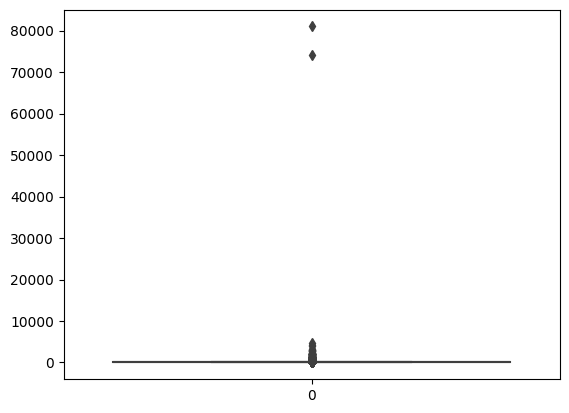

In [10]:
# Getting more visuals
sns.boxplot(retail_dat['Quantity'])

<Axes: >

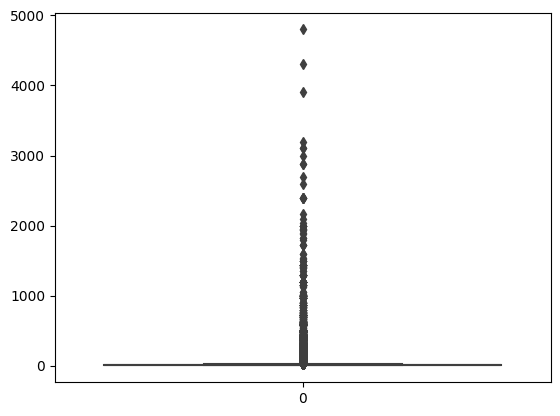

In [11]:
# As we can see, we have outliers between 70k and 80k
retail_dat = retail_dat[retail_dat['Quantity'] < 10000]
sns.boxplot(retail_dat['Quantity'])

<Axes: >

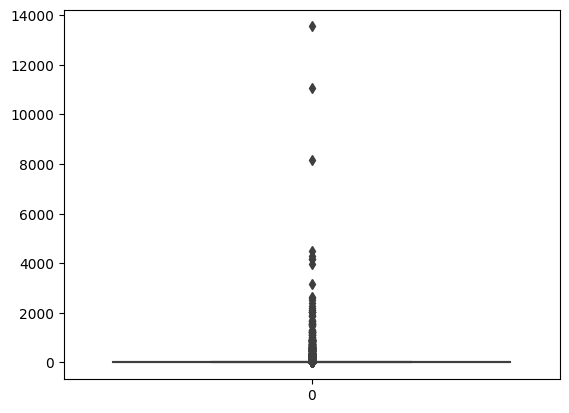

In [9]:
# getting a visual feel for the prices
sns.boxplot(retail_dat['UnitPrice'])

<Axes: >

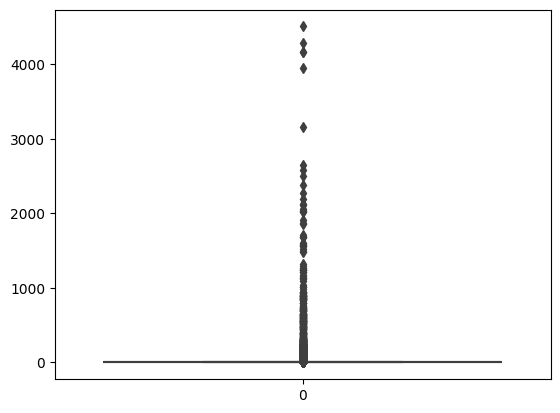

In [12]:
# We will be using the IQR outlier pruning method after removing the 3 above outliers up top
retail_dat = retail_dat[retail_dat['UnitPrice'] < 6000]
sns.boxplot(retail_dat['UnitPrice'])

In [16]:
# Counting na values
retail_dat.isna().apply(pd.value_counts)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
False,530099.0,530099.0,530099.0,530099.0,530099.0,530099.0,397881,530099.0
True,NaN,NaN,NaN,NaN,NaN,NaN,132218,NaN


In [19]:
# We do a bit of trolling
retail_dat.dropna(inplace = True)
%store retail_dat

Stored 'retail_dat' (DataFrame)
